In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [3]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [4]:
def load_data(file):
    df = pd.read_csv(file)
    df.drop(columns="Unnamed: 0", inplace= True)
    df = df.set_index("Date")
    return df

In [5]:
locA = load_data("data/LocationA.csv")
locB = load_data("data/LocationB.csv")
locC = load_data("data/LocationC.csv")
locD = load_data("data/LocationD.csv")

In [6]:
locA.head()

,TempA,pHA,ECA,DOA,BODA,TNA
Date,,,,,,
12/15/2021,21.50,7.73,1748,2.55,27.96,1.28
12/16/2021,21.21,7.82,1765,2.60,27.90,1.08
12/17/2021,21.21,7.73,1769,2.59,27.88,1.17
12/18/2021,21.26,7.82,1776,2.63,27.66,1.15
12/19/2021,21.09,7.76,1822,2.60,27.71,1.22


<AxesSubplot:xlabel='Date'>

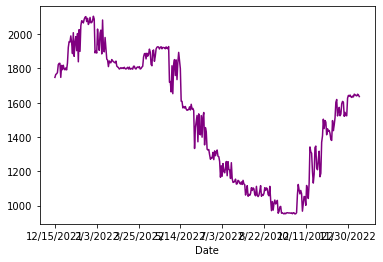

In [7]:
locA["ECA"].plot(color = "purple")

<AxesSubplot:xlabel='Date'>

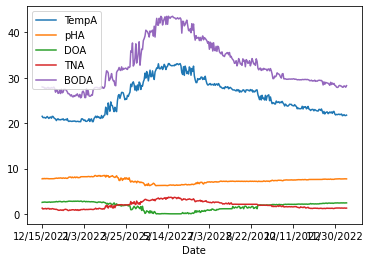

In [8]:
locA[["TempA", "pHA", "DOA", "TNA", "BODA"]].plot()

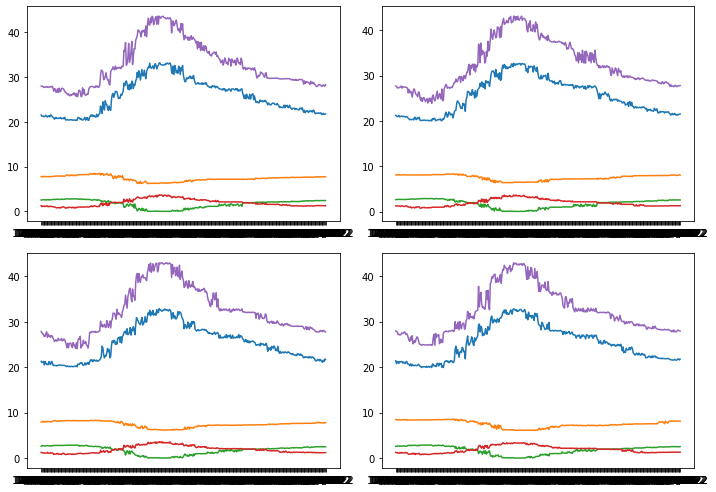

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

#create subplots
ax[0, 0].plot(locA[["TempA", "pHA", "DOA", "TNA", "BODA"]])
ax[0, 1].plot(locB[["TempB", "pHB", "DOB", "TNB", "BODB"]])
ax[1, 0].plot(locC[["TempC", "pHC", "DOC", "TNC", "BODC"]])
ax[1, 1].plot(locD[["TempD", "pHD", "DOD", "TND", "BODD"]])

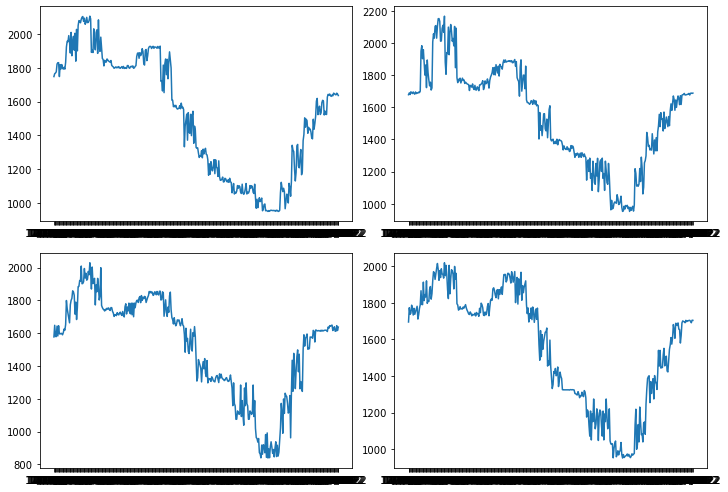

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

#create subplots
ax[0, 0].plot(locA["ECA"])
ax[0, 1].plot(locB["ECB"])
ax[1, 0].plot(locC["ECC"])
ax[1, 1].plot(locD["ECD"])

In [8]:
doA = locA["DOA"]
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(doA, WINDOW_SIZE)
X1.shape, y1.shape

((362, 3, 1), (362,))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

## LSTM

In [19]:
model1 = Sequential()
model1.add(InputLayer((3, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2023-10-22 22:21:52.051592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-22 22:21:52.051640: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-22 22:21:52.051669: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-10-22 22:21:52.051980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [21]:
cp1 = ModelCheckpoint('lstmmodel1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [22]:
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
1/8 [==>...........................] - ETA: 10s - loss: 4.0326 - root_mean_squared_error: 2.0081

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 5s 533ms/step - loss: 3.4864 - root_mean_squared_error: 1.8672 - val_loss: 3.0096 - val_root_mean_squared_error: 1.7348
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 2.7338 - root_mean_squared_error: 1.6534

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 484ms/step - loss: 3.3537 - root_mean_squared_error: 1.8313 - val_loss: 2.8957 - val_root_mean_squared_error: 1.7017
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 3.5674 - root_mean_squared_error: 1.8887

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 420ms/step - loss: 3.2307 - root_mean_squared_error: 1.7974 - val_loss: 2.7834 - val_root_mean_squared_error: 1.6683
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 3.6600 - root_mean_squared_error: 1.9131

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 496ms/step - loss: 3.1041 - root_mean_squared_error: 1.7619 - val_loss: 2.6767 - val_root_mean_squared_error: 1.6361
Epoch 5/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3504 - root_mean_squared_error: 1.5331

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 5s 642ms/step - loss: 2.9815 - root_mean_squared_error: 1.7267 - val_loss: 2.5698 - val_root_mean_squared_error: 1.6031
Epoch 6/100
1/8 [==>...........................] - ETA: 0s - loss: 2.2234 - root_mean_squared_error: 1.4911

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 2.8675 - root_mean_squared_error: 1.6934 - val_loss: 2.4885 - val_root_mean_squared_error: 1.5775
Epoch 7/100
1/8 [==>...........................] - ETA: 0s - loss: 2.4423 - root_mean_squared_error: 1.5628

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 2.7819 - root_mean_squared_error: 1.6679 - val_loss: 2.4105 - val_root_mean_squared_error: 1.5526
Epoch 8/100
1/8 [==>...........................] - ETA: 0s - loss: 2.5846 - root_mean_squared_error: 1.6077

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 445ms/step - loss: 2.6939 - root_mean_squared_error: 1.6413 - val_loss: 2.3326 - val_root_mean_squared_error: 1.5273
Epoch 9/100
1/8 [==>...........................] - ETA: 0s - loss: 2.8167 - root_mean_squared_error: 1.6783

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 375ms/step - loss: 2.6073 - root_mean_squared_error: 1.6147 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 10/100
1/8 [==>...........................] - ETA: 0s - loss: 2.9893 - root_mean_squared_error: 1.7289

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 590ms/step - loss: 2.5205 - root_mean_squared_error: 1.5876 - val_loss: 2.1796 - val_root_mean_squared_error: 1.4763
Epoch 11/100
1/8 [==>...........................] - ETA: 0s - loss: 2.1326 - root_mean_squared_error: 1.4603

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 415ms/step - loss: 2.4325 - root_mean_squared_error: 1.5597 - val_loss: 2.1033 - val_root_mean_squared_error: 1.4503
Epoch 12/100
1/8 [==>...........................] - ETA: 0s - loss: 2.8592 - root_mean_squared_error: 1.6909

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 424ms/step - loss: 2.3474 - root_mean_squared_error: 1.5321 - val_loss: 2.0259 - val_root_mean_squared_error: 1.4233
Epoch 13/100
1/8 [==>...........................] - ETA: 0s - loss: 2.1209 - root_mean_squared_error: 1.4563

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 388ms/step - loss: 2.2602 - root_mean_squared_error: 1.5034 - val_loss: 1.9496 - val_root_mean_squared_error: 1.3963
Epoch 14/100
1/8 [==>...........................] - ETA: 0s - loss: 2.0068 - root_mean_squared_error: 1.4166

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 384ms/step - loss: 2.1743 - root_mean_squared_error: 1.4746 - val_loss: 1.8726 - val_root_mean_squared_error: 1.3684
Epoch 15/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3580 - root_mean_squared_error: 1.5356

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 472ms/step - loss: 2.0889 - root_mean_squared_error: 1.4453 - val_loss: 1.7961 - val_root_mean_squared_error: 1.3402
Epoch 16/100
1/8 [==>...........................] - ETA: 0s - loss: 2.4943 - root_mean_squared_error: 1.5793

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 629ms/step - loss: 2.0033 - root_mean_squared_error: 1.4154 - val_loss: 1.7204 - val_root_mean_squared_error: 1.3116
Epoch 17/100
1/8 [==>...........................] - ETA: 0s - loss: 1.8238 - root_mean_squared_error: 1.3505

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 380ms/step - loss: 1.9161 - root_mean_squared_error: 1.3842 - val_loss: 1.6449 - val_root_mean_squared_error: 1.2825
Epoch 18/100
1/8 [==>...........................] - ETA: 0s - loss: 2.1150 - root_mean_squared_error: 1.4543

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 434ms/step - loss: 1.8329 - root_mean_squared_error: 1.3538 - val_loss: 1.5687 - val_root_mean_squared_error: 1.2525
Epoch 19/100
1/8 [==>...........................] - ETA: 0s - loss: 1.3481 - root_mean_squared_error: 1.1611

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 511ms/step - loss: 1.7445 - root_mean_squared_error: 1.3208 - val_loss: 1.4926 - val_root_mean_squared_error: 1.2217
Epoch 20/100
8/8 [==============================] - ETA: 0s - loss: 1.6594 - root_mean_squared_error: 1.2882

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 426ms/step - loss: 1.6594 - root_mean_squared_error: 1.2882 - val_loss: 1.4162 - val_root_mean_squared_error: 1.1900
Epoch 21/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4361 - root_mean_squared_error: 1.1984

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 5s 643ms/step - loss: 1.5729 - root_mean_squared_error: 1.2542 - val_loss: 1.3399 - val_root_mean_squared_error: 1.1576
Epoch 22/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4792 - root_mean_squared_error: 1.2162

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 424ms/step - loss: 1.4869 - root_mean_squared_error: 1.2194 - val_loss: 1.2627 - val_root_mean_squared_error: 1.1237
Epoch 23/100
1/8 [==>...........................] - ETA: 0s - loss: 1.3398 - root_mean_squared_error: 1.1575

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 452ms/step - loss: 1.3982 - root_mean_squared_error: 1.1825 - val_loss: 1.1859 - val_root_mean_squared_error: 1.0890
Epoch 24/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4110 - root_mean_squared_error: 1.1879

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 416ms/step - loss: 1.3124 - root_mean_squared_error: 1.1456 - val_loss: 1.1089 - val_root_mean_squared_error: 1.0531
Epoch 25/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4772 - root_mean_squared_error: 1.2154

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 415ms/step - loss: 1.2272 - root_mean_squared_error: 1.1078 - val_loss: 1.0337 - val_root_mean_squared_error: 1.0167
Epoch 26/100
1/8 [==>...........................] - ETA: 0s - loss: 1.0849 - root_mean_squared_error: 1.0416

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 380ms/step - loss: 1.1419 - root_mean_squared_error: 1.0686 - val_loss: 0.9604 - val_root_mean_squared_error: 0.9800
Epoch 27/100
1/8 [==>...........................] - ETA: 0s - loss: 0.9763 - root_mean_squared_error: 0.9881

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 576ms/step - loss: 1.0590 - root_mean_squared_error: 1.0291 - val_loss: 0.8872 - val_root_mean_squared_error: 0.9419
Epoch 28/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8160 - root_mean_squared_error: 0.9033

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 392ms/step - loss: 0.9771 - root_mean_squared_error: 0.9885 - val_loss: 0.8166 - val_root_mean_squared_error: 0.9037
Epoch 29/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8381 - root_mean_squared_error: 0.9155

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 423ms/step - loss: 0.8980 - root_mean_squared_error: 0.9476 - val_loss: 0.7467 - val_root_mean_squared_error: 0.8641
Epoch 30/100
1/8 [==>...........................] - ETA: 0s - loss: 0.9945 - root_mean_squared_error: 0.9972

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 451ms/step - loss: 0.8208 - root_mean_squared_error: 0.9060 - val_loss: 0.6782 - val_root_mean_squared_error: 0.8235
Epoch 31/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6899 - root_mean_squared_error: 0.8306

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 541ms/step - loss: 0.7427 - root_mean_squared_error: 0.8618 - val_loss: 0.6121 - val_root_mean_squared_error: 0.7824
Epoch 32/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6752 - root_mean_squared_error: 0.8217

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 485ms/step - loss: 0.6699 - root_mean_squared_error: 0.8185 - val_loss: 0.5494 - val_root_mean_squared_error: 0.7412
Epoch 33/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6123 - root_mean_squared_error: 0.7825

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 469ms/step - loss: 0.6005 - root_mean_squared_error: 0.7749 - val_loss: 0.4885 - val_root_mean_squared_error: 0.6989
Epoch 34/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5592 - root_mean_squared_error: 0.7478

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.5331 - root_mean_squared_error: 0.7301 - val_loss: 0.4324 - val_root_mean_squared_error: 0.6576
Epoch 35/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4901 - root_mean_squared_error: 0.7001

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.4716 - root_mean_squared_error: 0.6867 - val_loss: 0.3803 - val_root_mean_squared_error: 0.6167
Epoch 36/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4535 - root_mean_squared_error: 0.6734

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 358ms/step - loss: 0.4139 - root_mean_squared_error: 0.6433 - val_loss: 0.3313 - val_root_mean_squared_error: 0.5756
Epoch 37/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3983 - root_mean_squared_error: 0.6311

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 357ms/step - loss: 0.3608 - root_mean_squared_error: 0.6006 - val_loss: 0.2861 - val_root_mean_squared_error: 0.5349
Epoch 38/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3683 - root_mean_squared_error: 0.6068

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 561ms/step - loss: 0.3124 - root_mean_squared_error: 0.5589 - val_loss: 0.2456 - val_root_mean_squared_error: 0.4955
Epoch 39/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2355 - root_mean_squared_error: 0.4853

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 576ms/step - loss: 0.2679 - root_mean_squared_error: 0.5176 - val_loss: 0.2107 - val_root_mean_squared_error: 0.4591
Epoch 40/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2593 - root_mean_squared_error: 0.5092

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 435ms/step - loss: 0.2309 - root_mean_squared_error: 0.4805 - val_loss: 0.1787 - val_root_mean_squared_error: 0.4227
Epoch 41/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1568 - root_mean_squared_error: 0.3960

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 495ms/step - loss: 0.1959 - root_mean_squared_error: 0.4425 - val_loss: 0.1510 - val_root_mean_squared_error: 0.3886
Epoch 42/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1617 - root_mean_squared_error: 0.4022

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 403ms/step - loss: 0.1668 - root_mean_squared_error: 0.4084 - val_loss: 0.1266 - val_root_mean_squared_error: 0.3558
Epoch 43/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1867 - root_mean_squared_error: 0.4321

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 6s 788ms/step - loss: 0.1411 - root_mean_squared_error: 0.3757 - val_loss: 0.1062 - val_root_mean_squared_error: 0.3258
Epoch 44/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1165 - root_mean_squared_error: 0.3413

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 557ms/step - loss: 0.1194 - root_mean_squared_error: 0.3455 - val_loss: 0.0894 - val_root_mean_squared_error: 0.2990
Epoch 45/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1219 - root_mean_squared_error: 0.3492

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 549ms/step - loss: 0.1022 - root_mean_squared_error: 0.3196 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2751
Epoch 46/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0931 - root_mean_squared_error: 0.3052

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 453ms/step - loss: 0.0878 - root_mean_squared_error: 0.2964 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2540
Epoch 47/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0889 - root_mean_squared_error: 0.2981

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 602ms/step - loss: 0.0764 - root_mean_squared_error: 0.2764 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2351
Epoch 48/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0603 - root_mean_squared_error: 0.2455

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 573ms/step - loss: 0.0669 - root_mean_squared_error: 0.2586 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2190
Epoch 49/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0546 - root_mean_squared_error: 0.2336

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 633ms/step - loss: 0.0593 - root_mean_squared_error: 0.2436 - val_loss: 0.0420 - val_root_mean_squared_error: 0.2050
Epoch 50/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0551 - root_mean_squared_error: 0.2348

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 360ms/step - loss: 0.0534 - root_mean_squared_error: 0.2311 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 51/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1857

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 429ms/step - loss: 0.0490 - root_mean_squared_error: 0.2214 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1856
Epoch 52/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.1601

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 466ms/step - loss: 0.0458 - root_mean_squared_error: 0.2140 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1789
Epoch 53/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0652 - root_mean_squared_error: 0.2554

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 459ms/step - loss: 0.0435 - root_mean_squared_error: 0.2085 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 54/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0211 - root_mean_squared_error: 0.1454

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 612ms/step - loss: 0.0418 - root_mean_squared_error: 0.2044 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1696
Epoch 55/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0550 - root_mean_squared_error: 0.2346

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 468ms/step - loss: 0.0404 - root_mean_squared_error: 0.2011 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1668
Epoch 56/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0535 - root_mean_squared_error: 0.2313

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 417ms/step - loss: 0.0395 - root_mean_squared_error: 0.1987 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1646
Epoch 57/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1848

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 360ms/step - loss: 0.0388 - root_mean_squared_error: 0.1969 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1625
Epoch 58/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0412 - root_mean_squared_error: 0.2029

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0381 - root_mean_squared_error: 0.1953 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1609
Epoch 59/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0373 - root_mean_squared_error: 0.1930

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.0377 - root_mean_squared_error: 0.1940 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1598
Epoch 60/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0286 - root_mean_squared_error: 0.1690

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 491ms/step - loss: 0.0372 - root_mean_squared_error: 0.1929 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1585
Epoch 61/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.1415

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0369 - root_mean_squared_error: 0.1920 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1577
Epoch 62/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.1790

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1570
Epoch 63/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0486 - root_mean_squared_error: 0.2205

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 0.0363 - root_mean_squared_error: 0.1905 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1560
Epoch 64/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0173 - root_mean_squared_error: 0.1316

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0361 - root_mean_squared_error: 0.1899 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 65/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0573 - root_mean_squared_error: 0.2393

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 480ms/step - loss: 0.0358 - root_mean_squared_error: 0.1892 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1546
Epoch 66/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0440 - root_mean_squared_error: 0.2098

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 401ms/step - loss: 0.0356 - root_mean_squared_error: 0.1887 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1541
Epoch 67/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0414 - root_mean_squared_error: 0.2034

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 358ms/step - loss: 0.0354 - root_mean_squared_error: 0.1881 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533
Epoch 68/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.1084

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0351 - root_mean_squared_error: 0.1875 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 69/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0706 - root_mean_squared_error: 0.2657

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 375ms/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 70/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0399 - root_mean_squared_error: 0.1997

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 461ms/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 71/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0308 - root_mean_squared_error: 0.1755

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 525ms/step - loss: 0.0346 - root_mean_squared_error: 0.1859 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 72/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0322 - root_mean_squared_error: 0.1793

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0344 - root_mean_squared_error: 0.1854 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 73/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0559 - root_mean_squared_error: 0.2364

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0342 - root_mean_squared_error: 0.1848 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1500
Epoch 74/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0313 - root_mean_squared_error: 0.1768

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 393ms/step - loss: 0.0340 - root_mean_squared_error: 0.1844 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1495
Epoch 75/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0465 - root_mean_squared_error: 0.2157

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 434ms/step - loss: 0.0338 - root_mean_squared_error: 0.1839 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 76/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0318 - root_mean_squared_error: 0.1783

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 447ms/step - loss: 0.0336 - root_mean_squared_error: 0.1834 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 77/100
8/8 [==============================] - ETA: 0s - loss: 0.0335 - root_mean_squared_error: 0.1830

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 547ms/step - loss: 0.0335 - root_mean_squared_error: 0.1830 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1481
Epoch 78/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0299 - root_mean_squared_error: 0.1728

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 354ms/step - loss: 0.0334 - root_mean_squared_error: 0.1826 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1477
Epoch 79/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0411 - root_mean_squared_error: 0.2026

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 378ms/step - loss: 0.0332 - root_mean_squared_error: 0.1822 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1473
Epoch 80/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0318 - root_mean_squared_error: 0.1785

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 355ms/step - loss: 0.0331 - root_mean_squared_error: 0.1818 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469
Epoch 81/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0563 - root_mean_squared_error: 0.2372

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 426ms/step - loss: 0.0329 - root_mean_squared_error: 0.1814 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1467
Epoch 82/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.1643

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 496ms/step - loss: 0.0328 - root_mean_squared_error: 0.1810 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 83/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1857

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0326 - root_mean_squared_error: 0.1806 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1458
Epoch 84/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0363 - root_mean_squared_error: 0.1906

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 364ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1455
Epoch 85/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0292 - root_mean_squared_error: 0.1708

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 382ms/step - loss: 0.0324 - root_mean_squared_error: 0.1799 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1452
Epoch 86/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2142

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 455ms/step - loss: 0.0322 - root_mean_squared_error: 0.1795 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1448
Epoch 87/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0219 - root_mean_squared_error: 0.1480

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 401ms/step - loss: 0.0321 - root_mean_squared_error: 0.1792 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1444
Epoch 88/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1963

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 492ms/step - loss: 0.0320 - root_mean_squared_error: 0.1789 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 89/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0249 - root_mean_squared_error: 0.1577

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 351ms/step - loss: 0.0318 - root_mean_squared_error: 0.1784 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1439
Epoch 90/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0613 - root_mean_squared_error: 0.2476

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.0317 - root_mean_squared_error: 0.1781 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1438
Epoch 91/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0397 - root_mean_squared_error: 0.1993

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 357ms/step - loss: 0.0316 - root_mean_squared_error: 0.1777 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433
Epoch 92/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0163 - root_mean_squared_error: 0.1279

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.0314 - root_mean_squared_error: 0.1772 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 93/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0313 - root_mean_squared_error: 0.1771 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 94/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0437 - root_mean_squared_error: 0.2091

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 474ms/step - loss: 0.0312 - root_mean_squared_error: 0.1767 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1430
Epoch 95/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0364 - root_mean_squared_error: 0.1908

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 358ms/step - loss: 0.0311 - root_mean_squared_error: 0.1764 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 96/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1575

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 360ms/step - loss: 0.0310 - root_mean_squared_error: 0.1759 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 97/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0568 - root_mean_squared_error: 0.2383

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0308 - root_mean_squared_error: 0.1755 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1416
Epoch 98/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1828

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 2s 355ms/step - loss: 0.0307 - root_mean_squared_error: 0.1752 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1415
Epoch 99/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.2071

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 397ms/step - loss: 0.0306 - root_mean_squared_error: 0.1749 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 100/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1698

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 517ms/step - loss: 0.0305 - root_mean_squared_error: 0.1746 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1409


In [23]:
model1 = load_model('lstmmodel1/')

In [24]:
train_predictions = model1.predict(x_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

8/8 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,0.176350,0.01
1,2.157978,2.17
2,1.796982,0.94
3,1.482837,1.42
4,2.055072,2.09
...,...,...
226,2.407367,2.45
227,2.347026,2.40
228,0.309499,0.07
229,2.051253,2.04


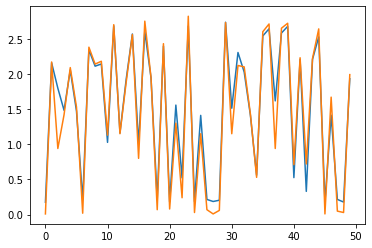

In [25]:
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actuals'][:50])

In [26]:
def plot_val(model,Nsample):
    val_predictions = model.predict(x_val).flatten()
    val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
    plt.plot(val_results['Val Predictions'][:Nsample])
    plt.plot(val_results['Actuals'][:Nsample])

In [27]:
val_predictions = model1.predict(x_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

2/2 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,0.912046,0.81
1,2.576581,2.56
2,0.737677,0.92
3,0.695246,0.78
4,2.348046,2.43
5,2.297426,2.02
6,2.124618,2.11
7,0.989401,0.94
8,1.470530,1.51
9,2.098287,2.00


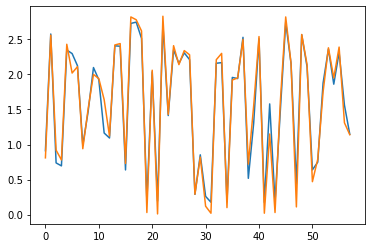

In [28]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [10]:
def plot_test(model, Nsample):
    test_predictions = model.predict(x_test).flatten()
    test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
    plt.plot(test_results['Test Predictions'][:Nsample])
    plt.plot(test_results['Actuals'][:Nsample])

In [30]:
test_predictions = model1.predict(x_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

3/3 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,1.964109,1.96
1,2.120595,2.18
2,1.837681,1.90
3,0.359868,0.40
4,0.236129,0.05
...,...,...
68,2.218651,2.24
69,2.123446,2.14
70,1.147022,1.15
71,2.154301,2.14


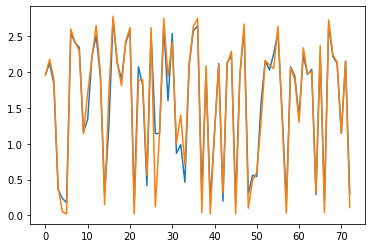

In [31]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [11]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

3/3 [==============================] - 0s 3ms/step


(    Predictions  Actuals
 0      1.964109     1.96
 1      2.120595     2.18
 2      1.837681     1.90
 3      0.359868     0.40
 4      0.236129     0.05
 ..          ...      ...
 68     2.218651     2.24
 69     2.123446     2.14
 70     1.147022     1.15
 71     2.154301     2.14
 72     0.292637     0.11
 
 [73 rows x 2 columns],
 0.03369401638901186)

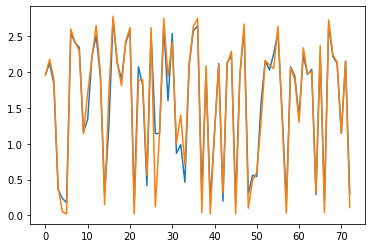

In [33]:
plot_predictions1(model1, x_test, y_test)

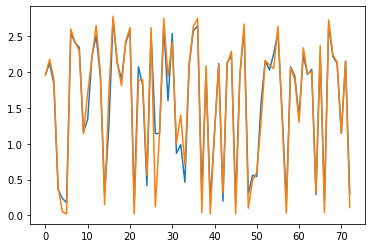

In [36]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [48]:
tested_val = model1.predict(x_test)
tested_val.shape

3/3 [==============================] - 0s 2ms/step


(73, 1)

In [52]:
test_predictions.shape

(73,)

In [53]:
y_test.shape

(73,)

## CNN

In [37]:
model2 = Sequential()
model2.add(InputLayer((3, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [66]:
cp2 = ModelCheckpoint('cnnmodel2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [12]:
def fit_model(model, cp, epochs):
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, callbacks=[cp])
    return model

In [69]:
model2 = fit_model(model2, cp2, 10)

Epoch 1/10
1/8 [==>...........................] - ETA: 2s - loss: 1.1828 - root_mean_squared_error: 1.0875

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 1s 83ms/step - loss: 1.1128 - root_mean_squared_error: 1.0549 - val_loss: 0.8642 - val_root_mean_squared_error: 0.9296
Epoch 2/10
1/8 [==>...........................] - ETA: 0s - loss: 1.0560 - root_mean_squared_error: 1.0276

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 0s 70ms/step - loss: 0.8905 - root_mean_squared_error: 0.9437 - val_loss: 0.6828 - val_root_mean_squared_error: 0.8263
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 0.7522 - root_mean_squared_error: 0.8673

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 0s 70ms/step - loss: 0.7001 - root_mean_squared_error: 0.8367 - val_loss: 0.5285 - val_root_mean_squared_error: 0.7270
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 0.6559 - root_mean_squared_error: 0.8099

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 0s 68ms/step - loss: 0.5379 - root_mean_squared_error: 0.7334 - val_loss: 0.4023 - val_root_mean_squared_error: 0.6343
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 0.4908 - root_mean_squared_error: 0.7006

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 0s 70ms/step - loss: 0.4134 - root_mean_squared_error: 0.6430 - val_loss: 0.3108 - val_root_mean_squared_error: 0.5575
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 0.3685 - root_mean_squared_error: 0.6070

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 1s 72ms/step - loss: 0.3185 - root_mean_squared_error: 0.5644 - val_loss: 0.2371 - val_root_mean_squared_error: 0.4869
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 0.2716 - root_mean_squared_error: 0.5212

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 1s 88ms/step - loss: 0.2433 - root_mean_squared_error: 0.4933 - val_loss: 0.1783 - val_root_mean_squared_error: 0.4222
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 0.2183 - root_mean_squared_error: 0.4672

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 1s 102ms/step - loss: 0.1833 - root_mean_squared_error: 0.4282 - val_loss: 0.1329 - val_root_mean_squared_error: 0.3645
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 0.1593 - root_mean_squared_error: 0.3991

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 2s 264ms/step - loss: 0.1388 - root_mean_squared_error: 0.3725 - val_loss: 0.0986 - val_root_mean_squared_error: 0.3140
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 0.1175 - root_mean_squared_error: 0.3428

INFO:tensorflow:Assets written to: cnnmodel2/assets


INFO:tensorflow:Assets written to: cnnmodel2/assets


8/8 [==============================] - 1s 79ms/step - loss: 0.1051 - root_mean_squared_error: 0.3242 - val_loss: 0.0742 - val_root_mean_squared_error: 0.2725


In [13]:
def plot_train(modelname, Nsample):
    model = load_model(modelname)
    train_predictions = model.predict(x_train).flatten()
    train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
    plt.plot(train_results['Train Predictions'][:Nsample])
    plt.plot(train_results['Actuals'][:Nsample])

8/8 [==============================] - 0s 2ms/step


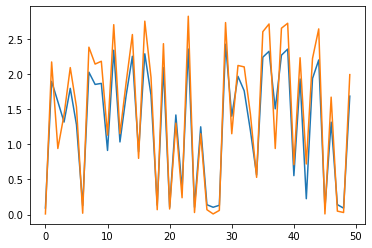

In [74]:
plot_train("cnnmodel2", 50)

2/2 [==============================] - 0s 2ms/step


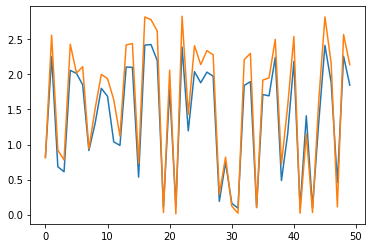

In [75]:
plot_val(model2, 50)

3/3 [==============================] - 0s 3ms/step


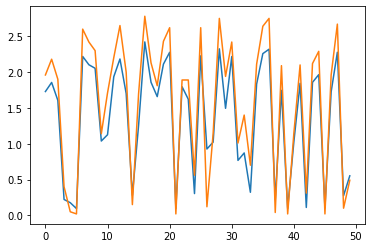

In [76]:
plot_test(model2, 50)

3/3 [==============================] - 0s 4ms/step


(    Predictions  Actuals
 0      1.728765     1.96
 1      1.855364     2.18
 2      1.605830     1.90
 3      0.221747     0.40
 4      0.176536     0.05
 ..          ...      ...
 68     1.962197     2.24
 69     1.847082     2.14
 70     1.022595     1.15
 71     1.878945     2.14
 72     0.182540     0.11
 
 [73 rows x 2 columns],
 0.08708976809397889)

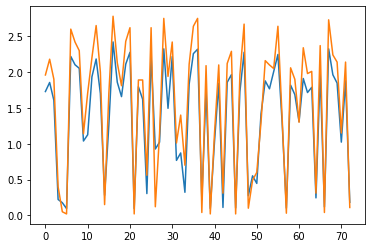

In [77]:
plot_predictions1(model2,x_test, y_test)

## Moving Average 

In [14]:
import numpy as np
import tensorflow as tf

class MovingAverageCNNModel(tf.keras.Model):
    def __init__(self, moving_average_window_size, cnn_architecture):
        super(MovingAverageCNNModel, self).__init__()

        self.moving_average_window_size = moving_average_window_size
        self.cnn_model = cnn_architecture()

    def call(self, inputs):
        moving_average_filtered_inputs = tf.keras.layers.AveragePooling1D(pool_size=self.moving_average_window_size, strides=1)(inputs)

        outputs = self.cnn_model(moving_average_filtered_inputs)

        return outputs


In [ ]:
time_series_data = np.loadtxt("time_series_data.csv", delimiter=",")
train_data = time_series_data[:int(0.8 * len(time_series_data))]
test_data = time_series_data[int(0.8 * len(time_series_data)):]
moving_average_cnn_model = MovingAverageCNNModel(moving_average_window_size=10, cnn_architecture= tf.keras.applications.VGG16)
moving_average_cnn_model.compile(optimizer="adam", loss="mse")
moving_average_cnn_model.fit(train_data, train_data, epochs=100)